# Airline Customer Satisfaction

![Picture title](image-20230309-064858.png)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (30,20)


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
!pip install xgboost==1.7.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import xgboost as xgb

In [5]:
!pip install shap==0.41.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 36.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
import shap

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dataframe_train = pd.read_csv('train.csv')
dataframe_test = pd.read_csv('test.csv')

## Data Cleansing

In [8]:
dataframe_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
mode_values = dataframe_train.mode().iloc[0]
dataframe_train = dataframe_train.fillna(mode_values)

In [10]:
dataframe_train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
dataframe_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103899    False
103900    False
103901    False
103902    False
103903    False
Length: 103904, dtype: bool

In [12]:
dataframe_train.duplicated().sum()

0

In [13]:
dataframe_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [14]:
dataframe_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Exploratory Data Analysis

In [15]:
dataframe_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
dataframe_train.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


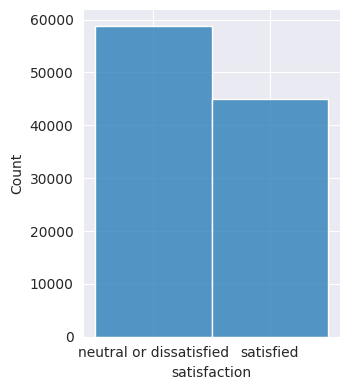

In [17]:
sns.displot(x = dataframe_train['satisfaction'],height=4, aspect=0.9)

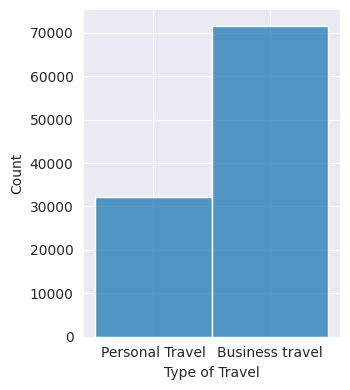

In [18]:
sns.displot(x = dataframe_train['Type of Travel'],height=4, aspect=0.9)

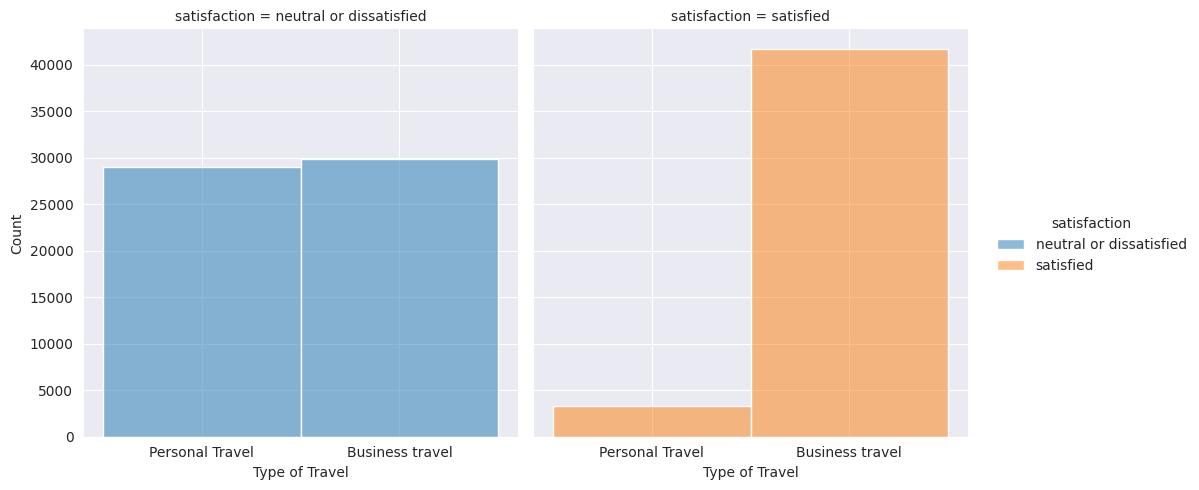

In [19]:
sns.displot(x=dataframe_train['Type of Travel'], hue=dataframe_train['satisfaction'], col=dataframe_train['satisfaction'])


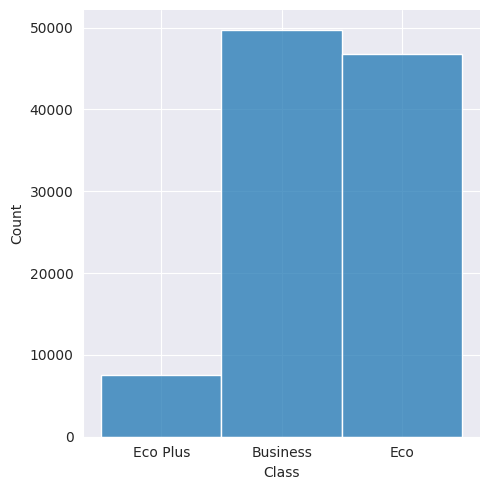

In [20]:
sns.displot(x = dataframe_train['Class'])

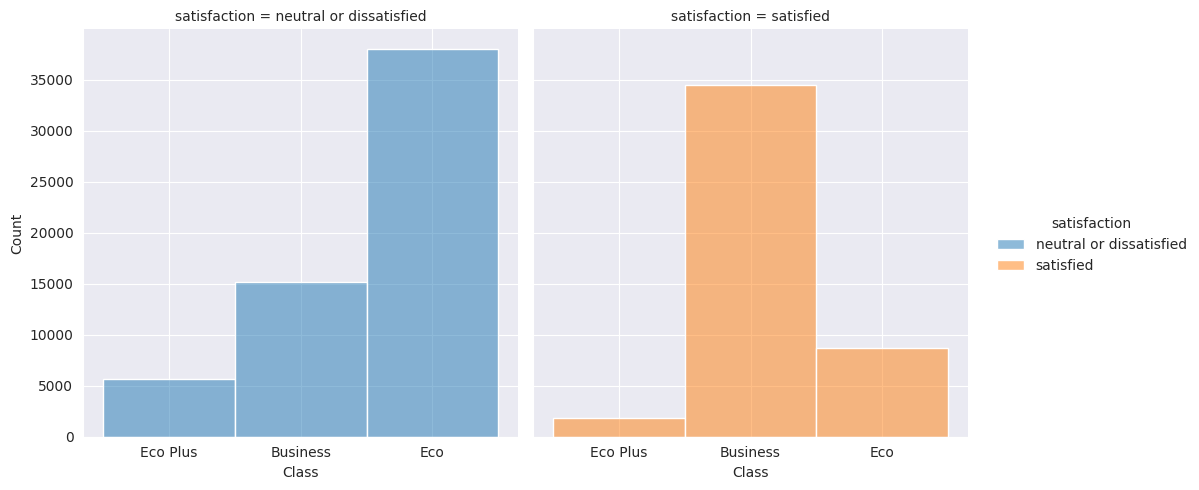

In [21]:
sns.displot(x=dataframe_train['Class'], hue=dataframe_train['satisfaction'], col=dataframe_train['satisfaction'])

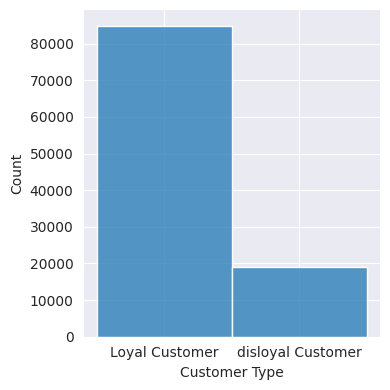

In [22]:
sns.displot(x = dataframe_train['Customer Type'], height=4, aspect=1)

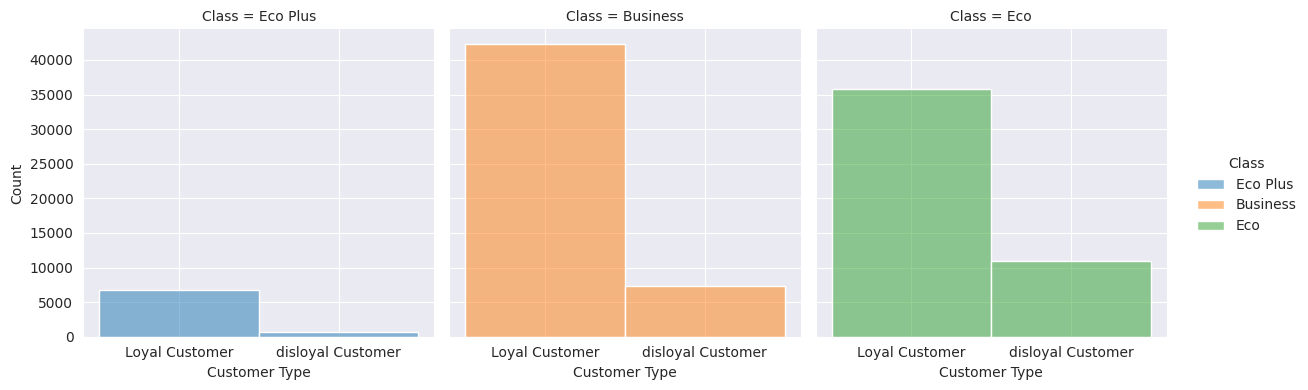

In [23]:
sns.displot(x = dataframe_train['Customer Type'], hue=dataframe_train['Class'],col=dataframe_train['Class'], height=4, aspect=1)

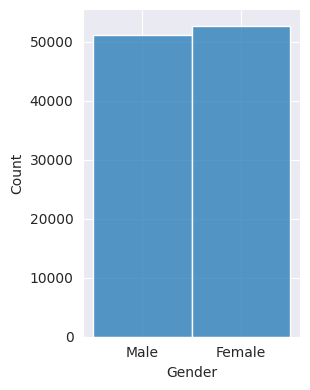

In [24]:
sns.displot(x = dataframe_train['Gender'],height=4, aspect=0.8)

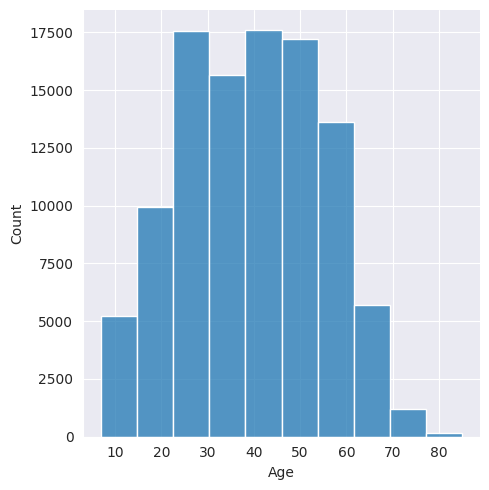

In [25]:
sns.displot(x = dataframe_train['Age'], bins = 10)

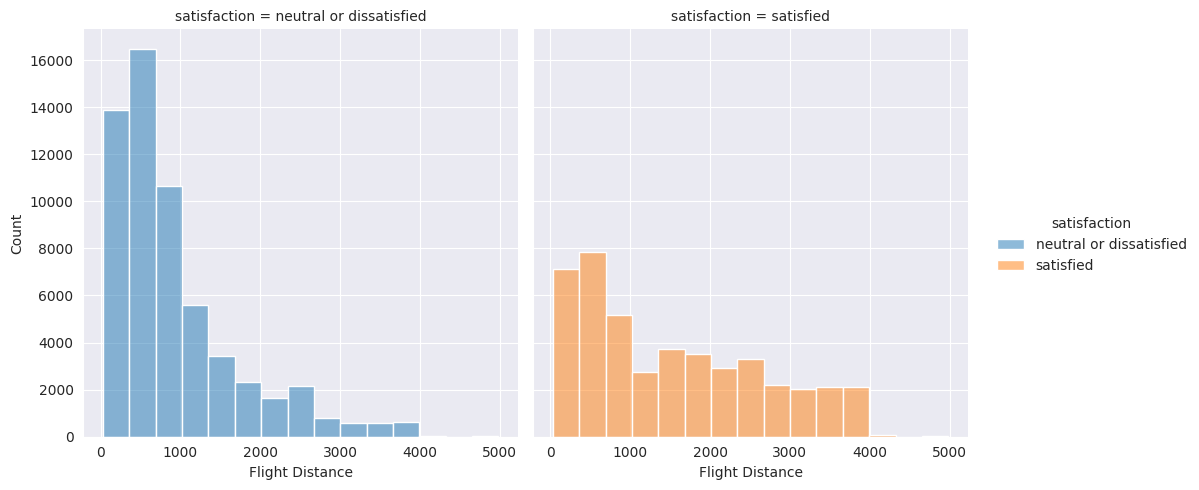

In [26]:
sns.displot(x = dataframe_train['Flight Distance'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 15)

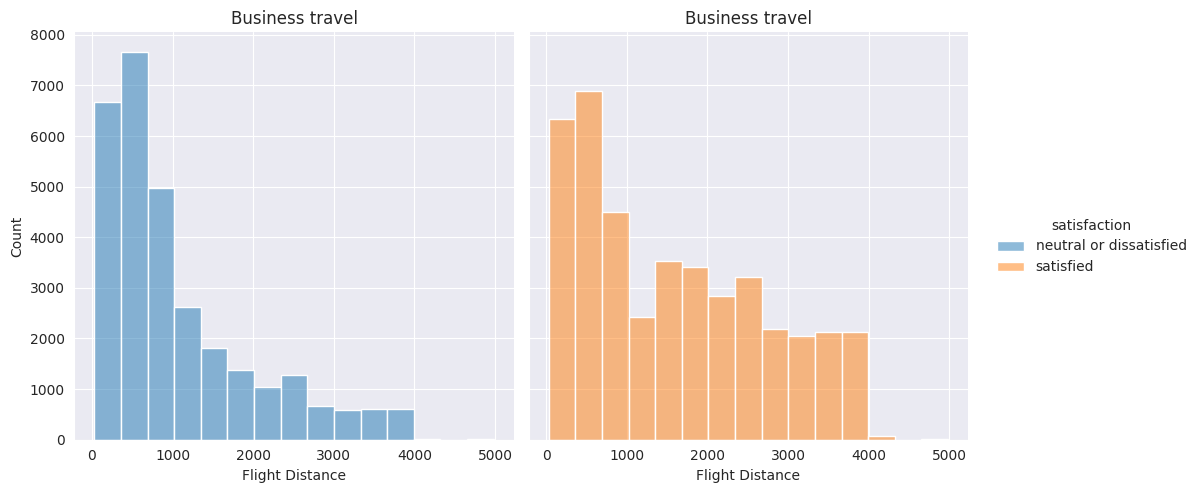

In [27]:
plot1 = sns.displot(x=dataframe_train[dataframe_train['Type of Travel'] == 'Business travel']['Flight Distance'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins=15)
plot1.set(title='Business travel')

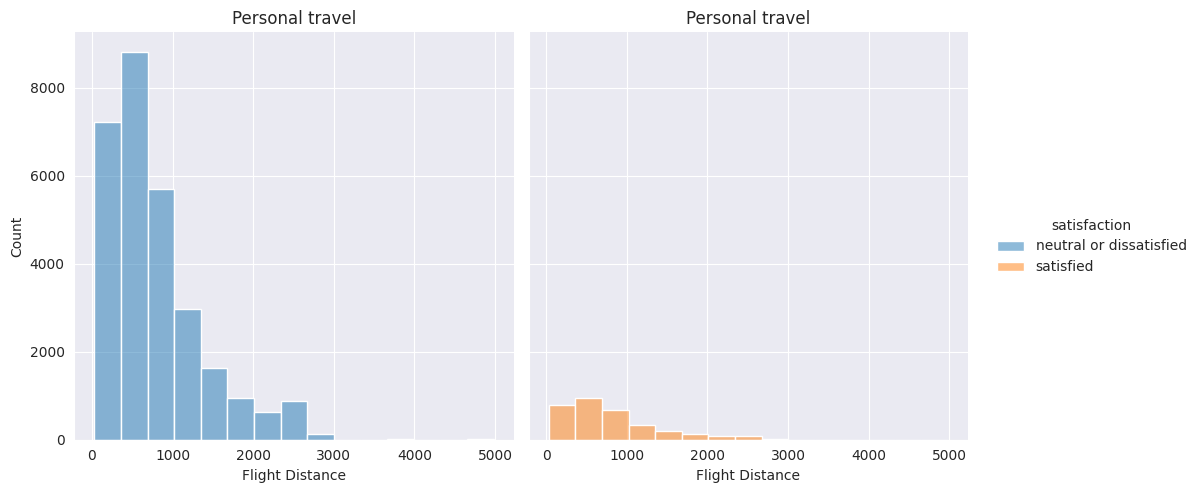

In [28]:
plot2 = sns.displot(x=dataframe_train[dataframe_train['Type of Travel'] == 'Personal Travel']['Flight Distance'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins=15)
plot2.set(title='Personal travel')

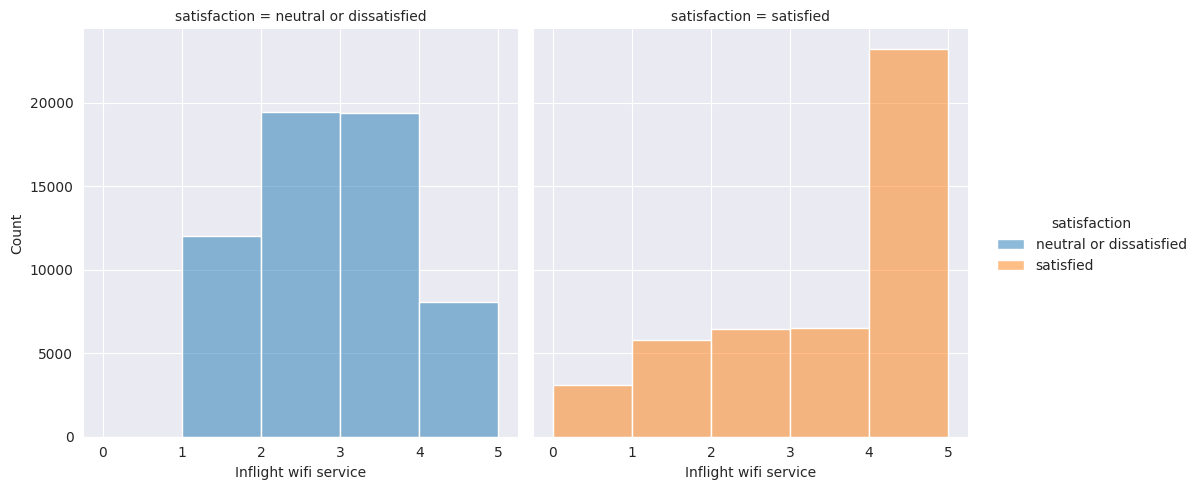

In [29]:
sns.displot(x = dataframe_train['Inflight wifi service'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)

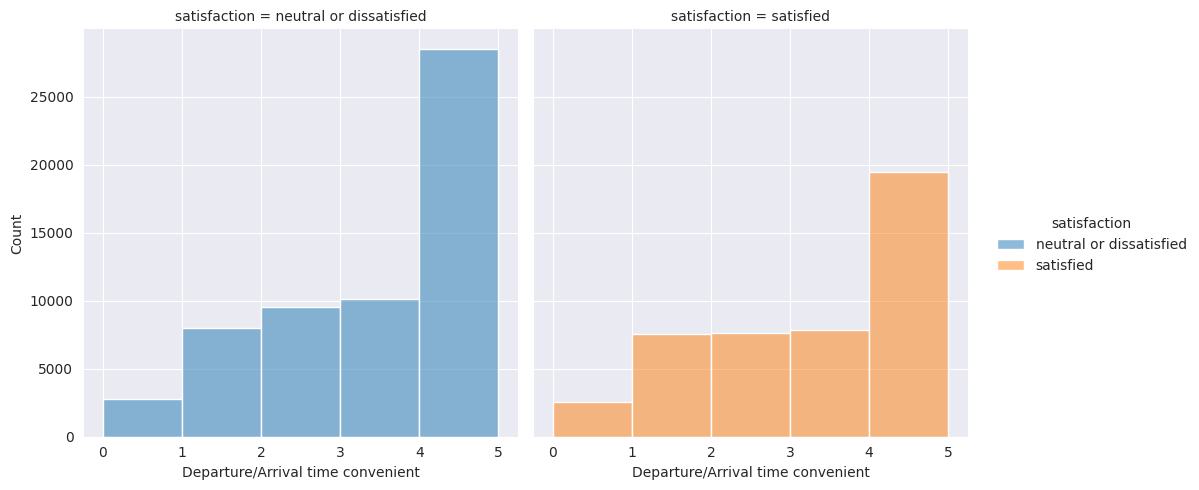

In [30]:
sns.displot(x = dataframe_train['Departure/Arrival time convenient'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)

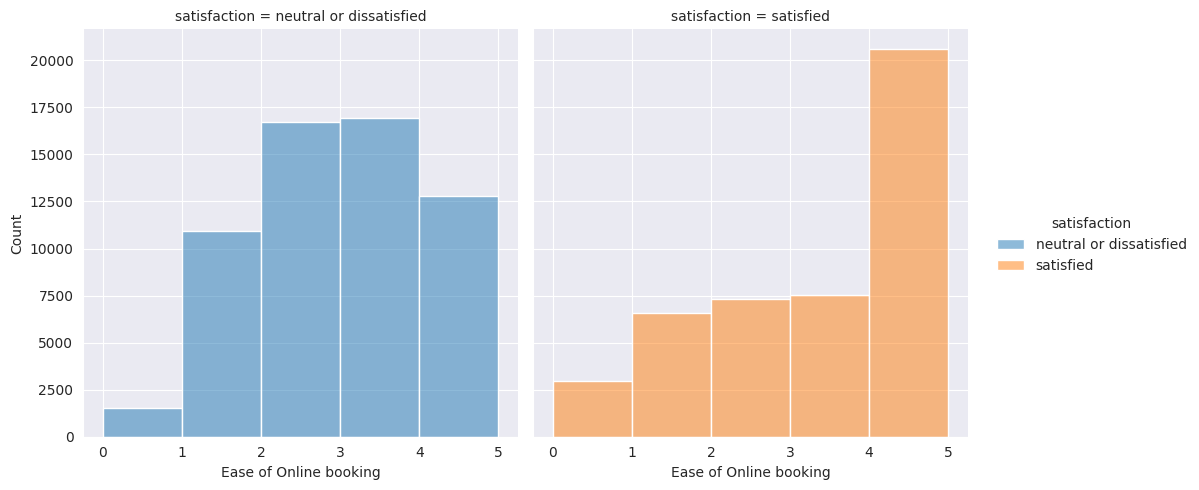

In [31]:
sns.displot(x = dataframe_train['Ease of Online booking'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


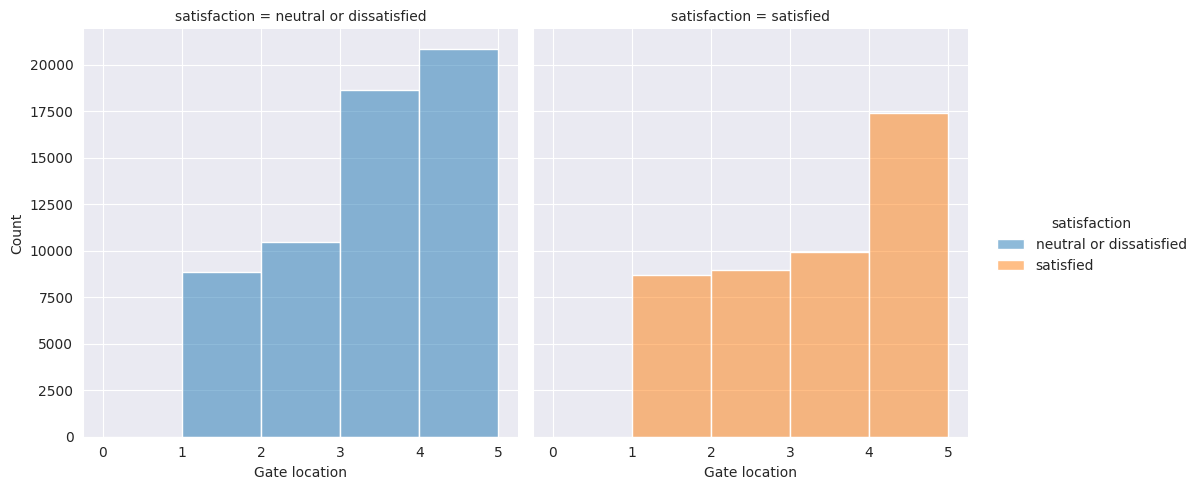

In [32]:
sns.displot(x = dataframe_train['Gate location'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


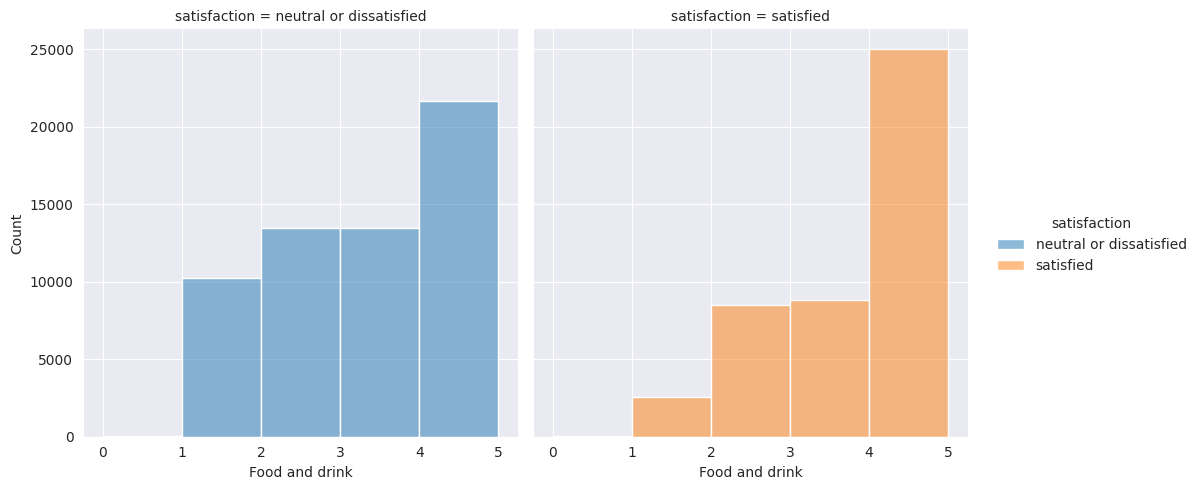

In [33]:
sns.displot(x = dataframe_train['Food and drink'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


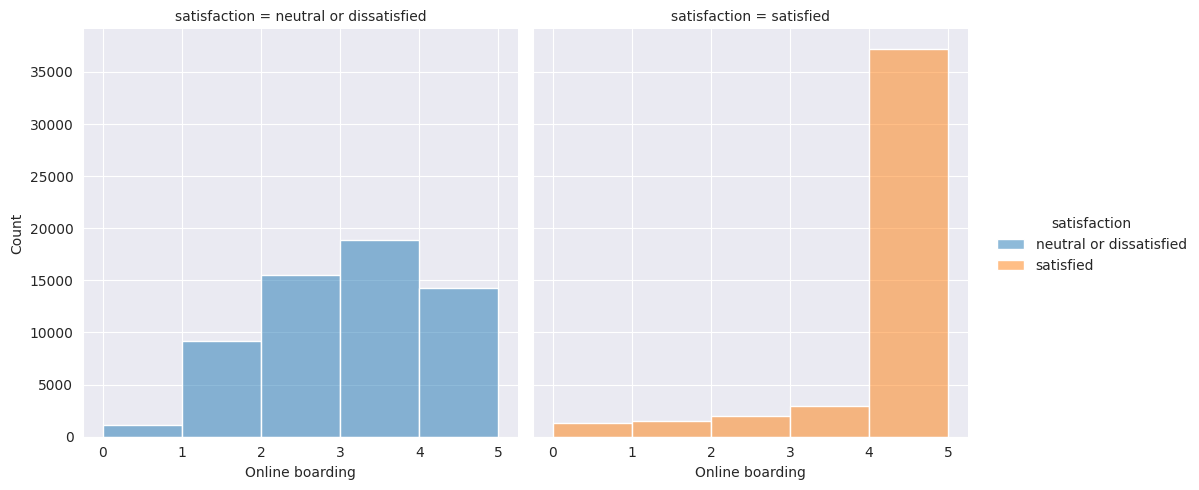

In [34]:
sns.displot(x = dataframe_train['Online boarding'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


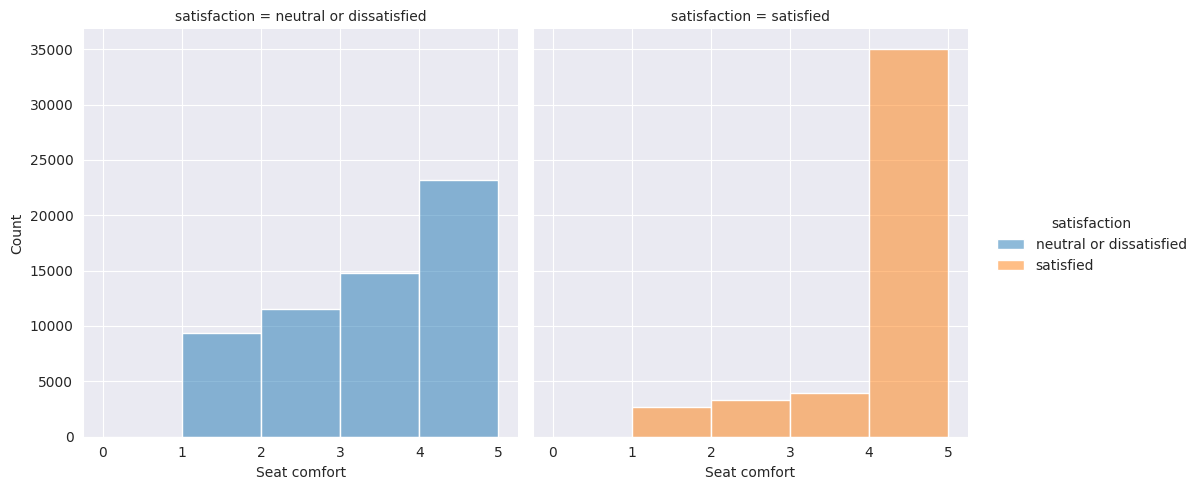

In [35]:
sns.displot(x = dataframe_train['Seat comfort'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


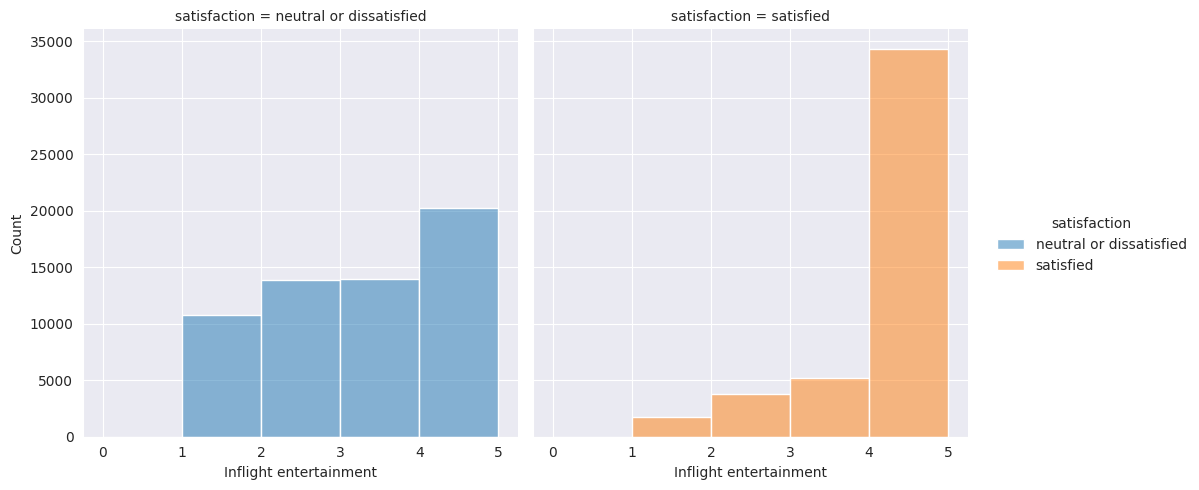

In [36]:
sns.displot(x = dataframe_train['Inflight entertainment'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


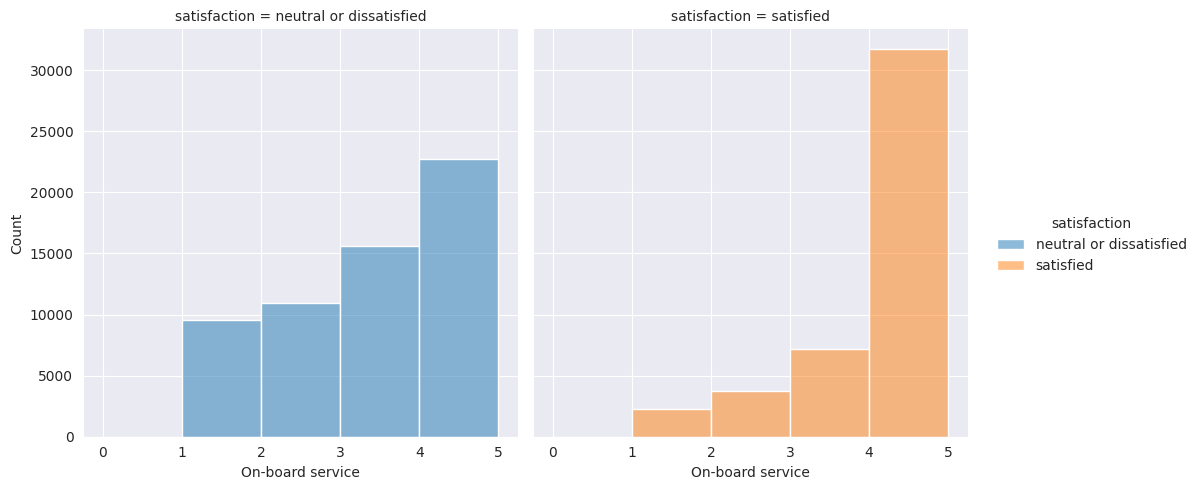

In [37]:
sns.displot(x = dataframe_train['On-board service'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


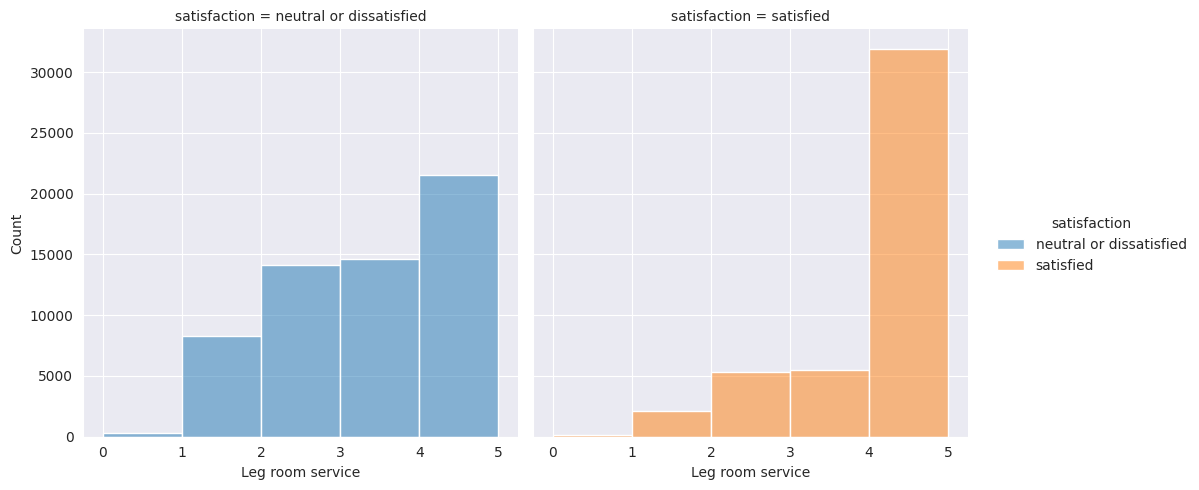

In [38]:
sns.displot(x = dataframe_train['Leg room service'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


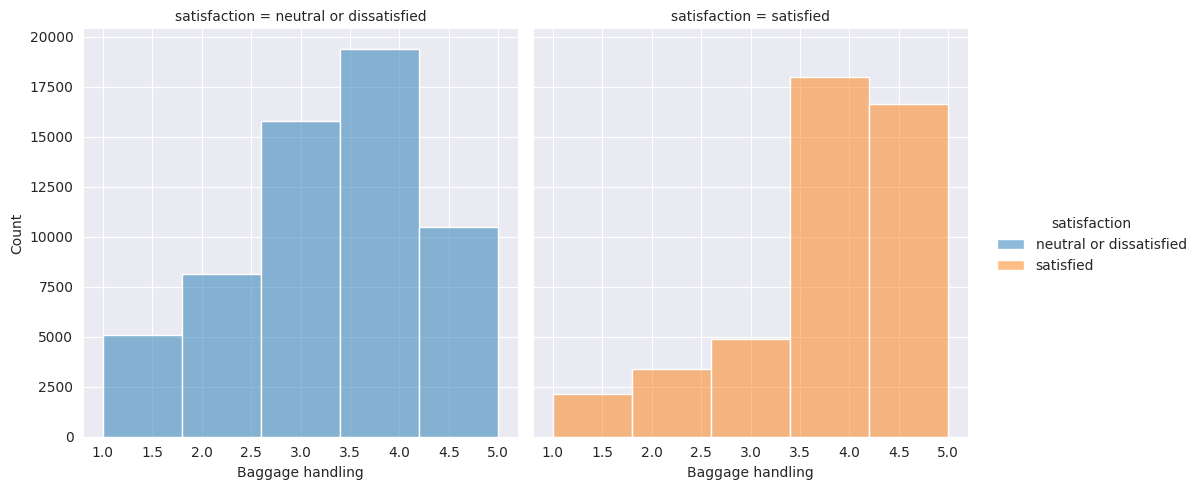

In [39]:
sns.displot(x = dataframe_train['Baggage handling'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


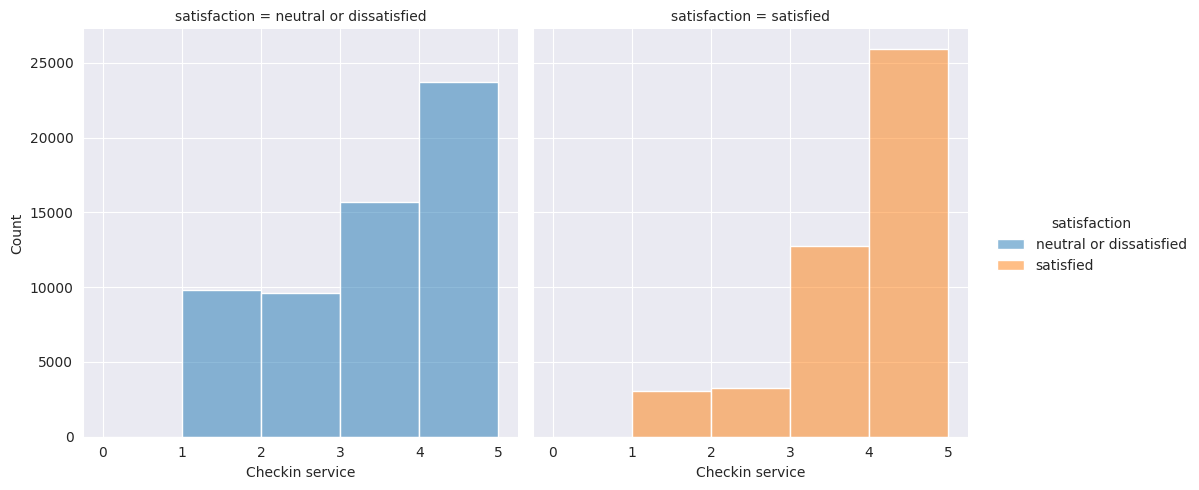

In [40]:
sns.displot(x = dataframe_train['Checkin service'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)


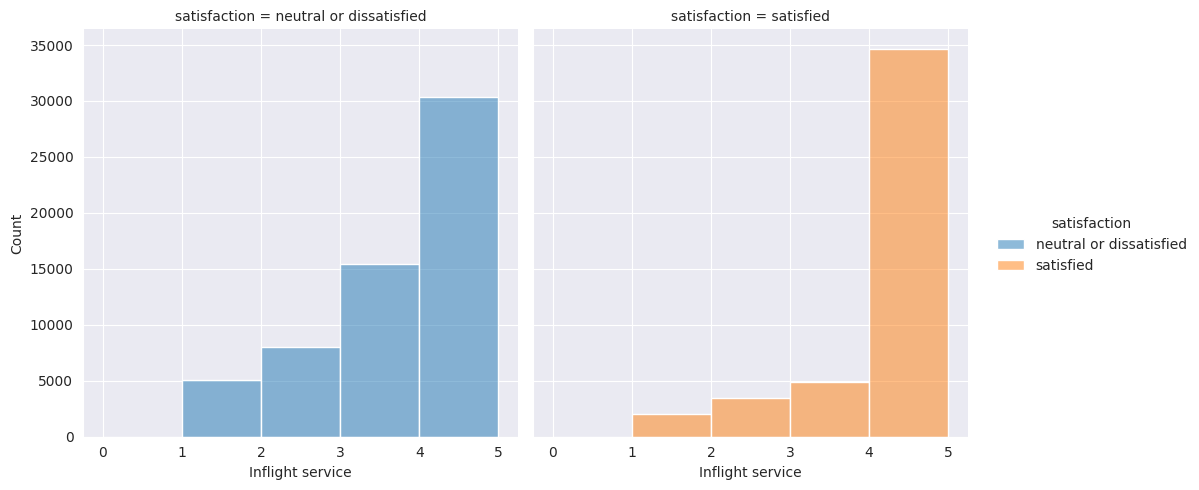

In [41]:
sns.displot(x = dataframe_train['Inflight service'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)

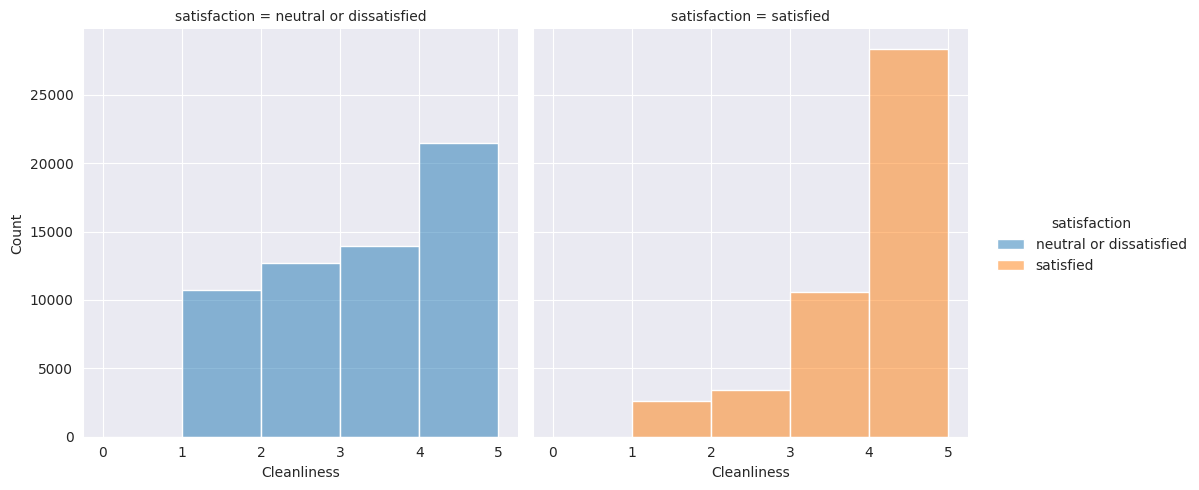

In [42]:
sns.displot(x = dataframe_train['Cleanliness'],hue=dataframe_train['satisfaction'],col=dataframe_train['satisfaction'], bins = 5)

In [43]:
dataframe_train_scores = dataframe_train.drop(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], axis=1)
dataframe_train_scores.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


<AxesSubplot: >

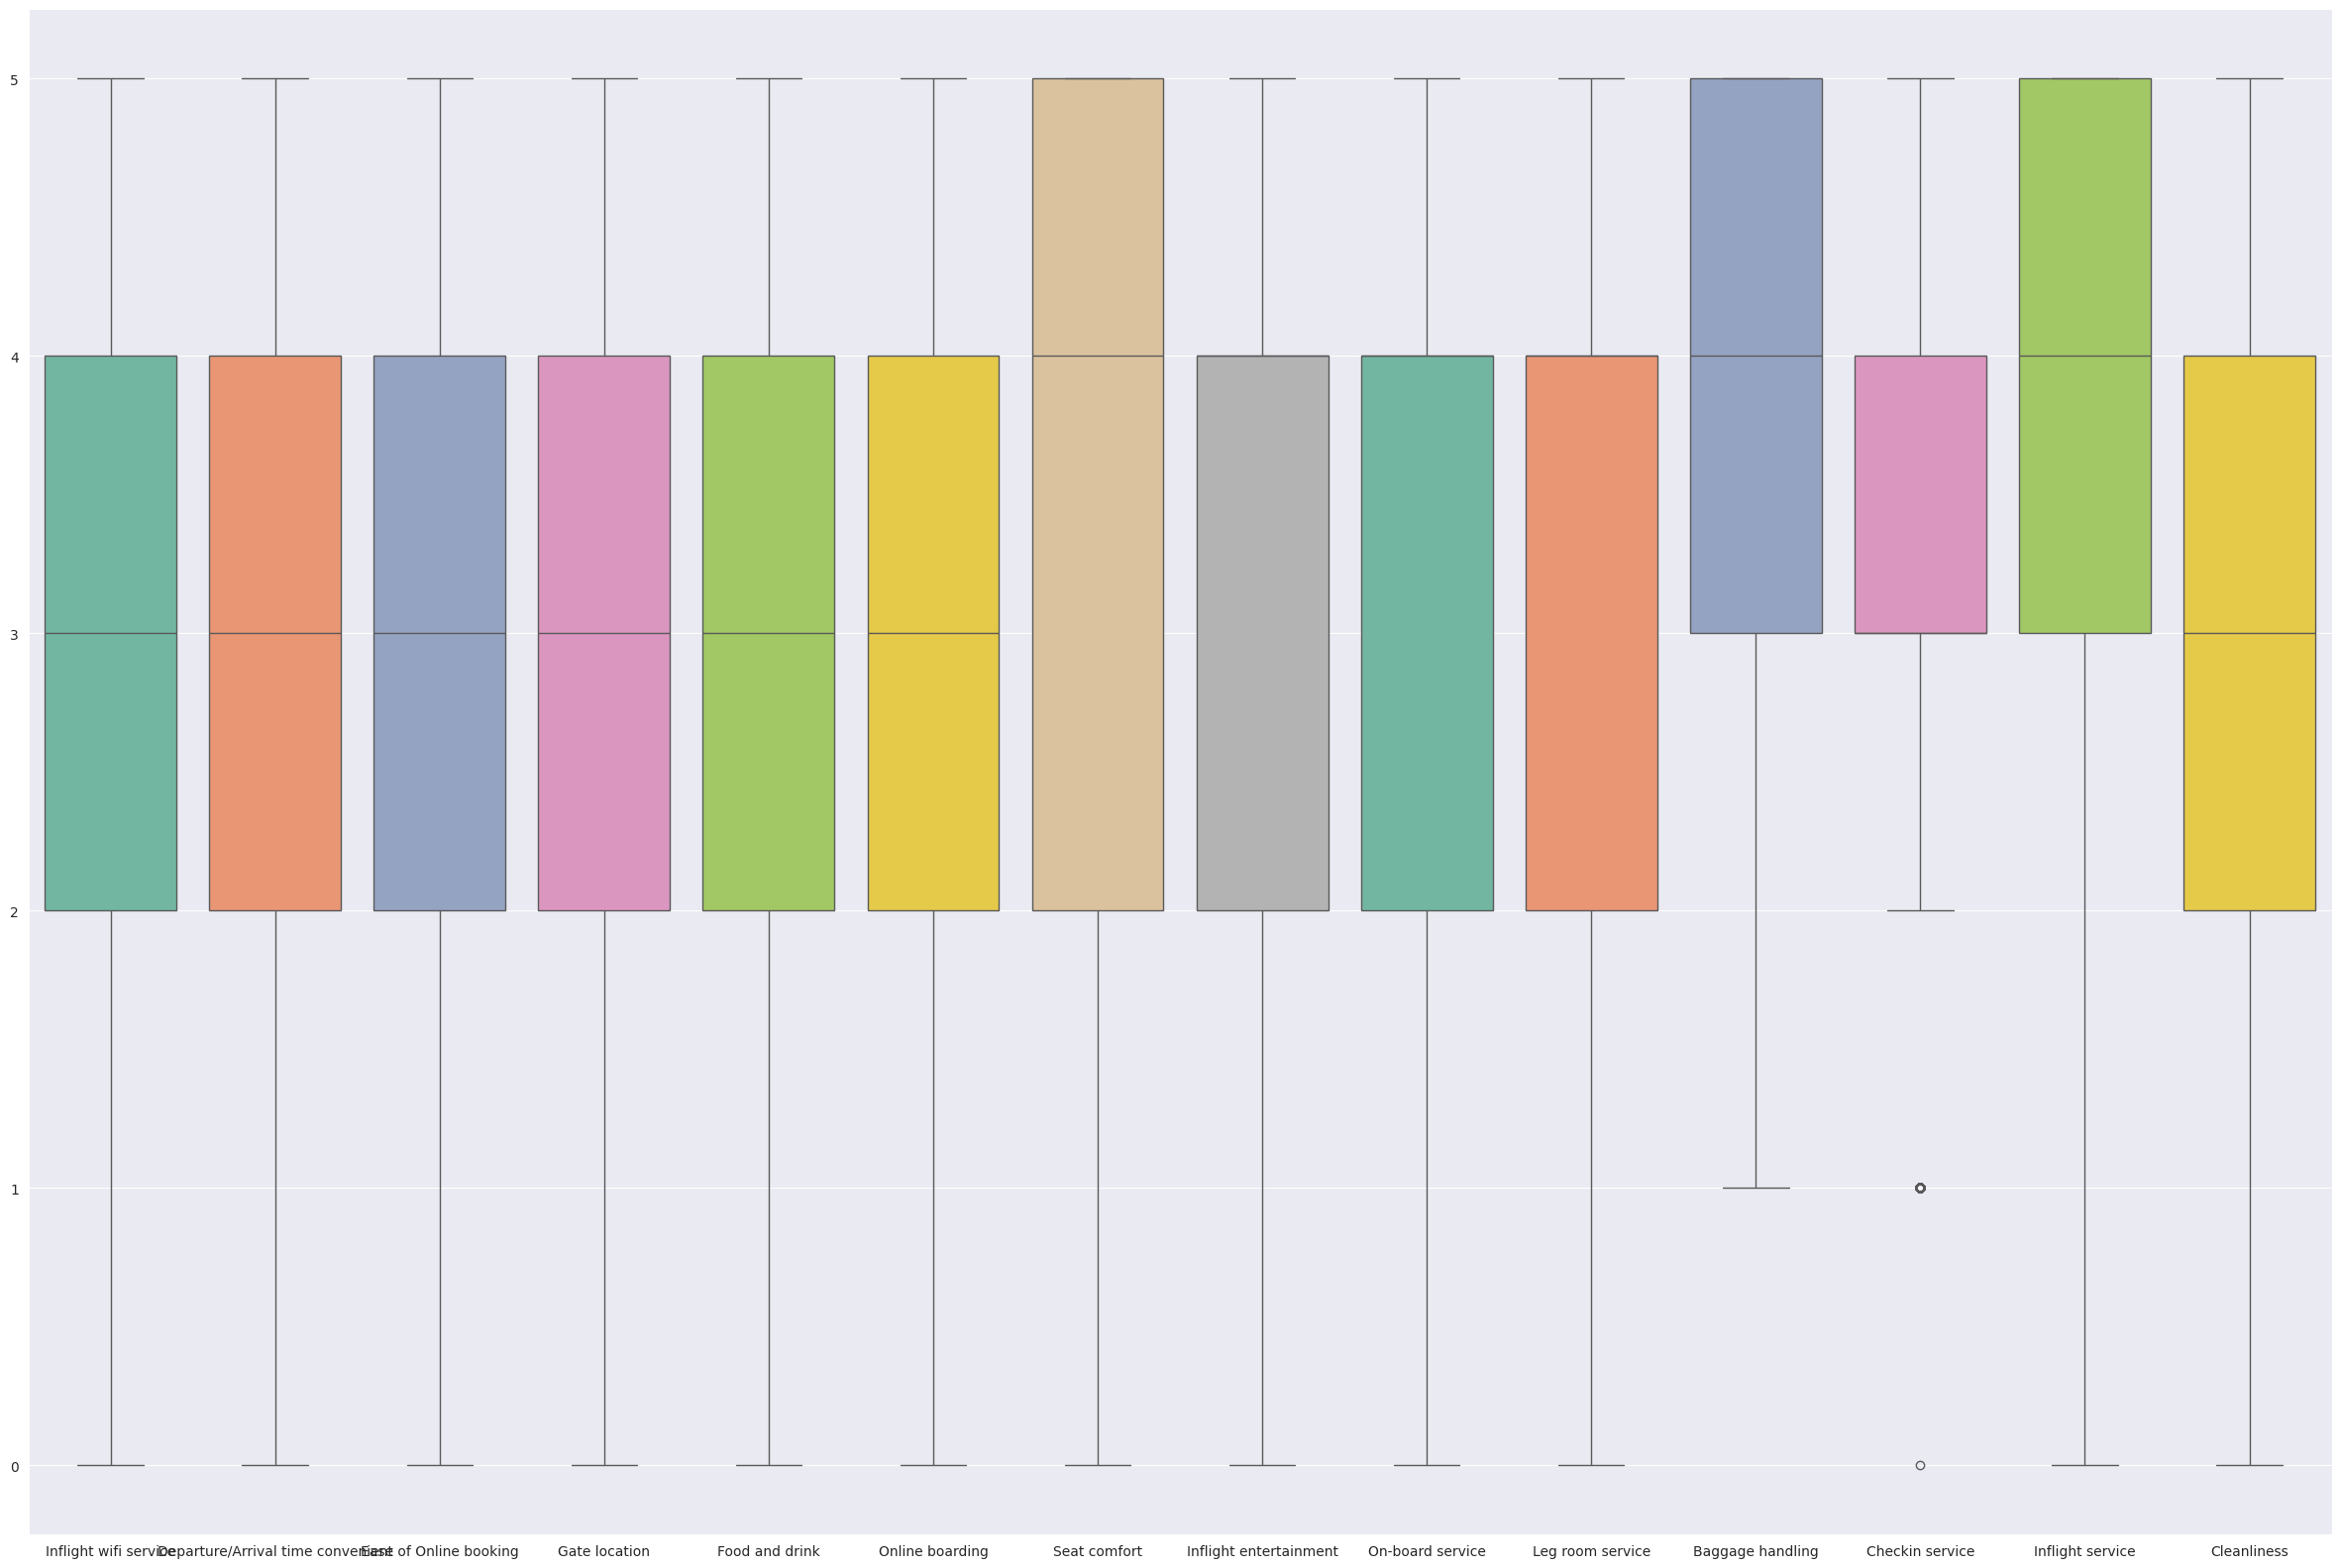

In [44]:
sns.boxplot(data=dataframe_train_scores, palette="Set2")

In [45]:
dataframe_train_scores.corr()


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Inflight wifi service,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698
Departure/Arrival time convenient,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292
Ease of Online booking,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179
Gate location,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830
Food and drink,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760
Online boarding,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517
Seat comfort,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534
Inflight entertainment,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815
On-board service,0.121500,0.068882,0.038833,-0.028373,0.059073,0.155443,0.131971,0.420153,1.000000,0.355495,0.519134,0.243914,0.550782,0.123220
Leg room service,0.160473,0.012441,0.107601,-0.005873,0.032498,0.123950,0.105559,0.299692,0.355495,1.000000,0.369544,0.153137,0.368656,0.096370


Text(0.5, 1.0, 'Correlation Heatmap')

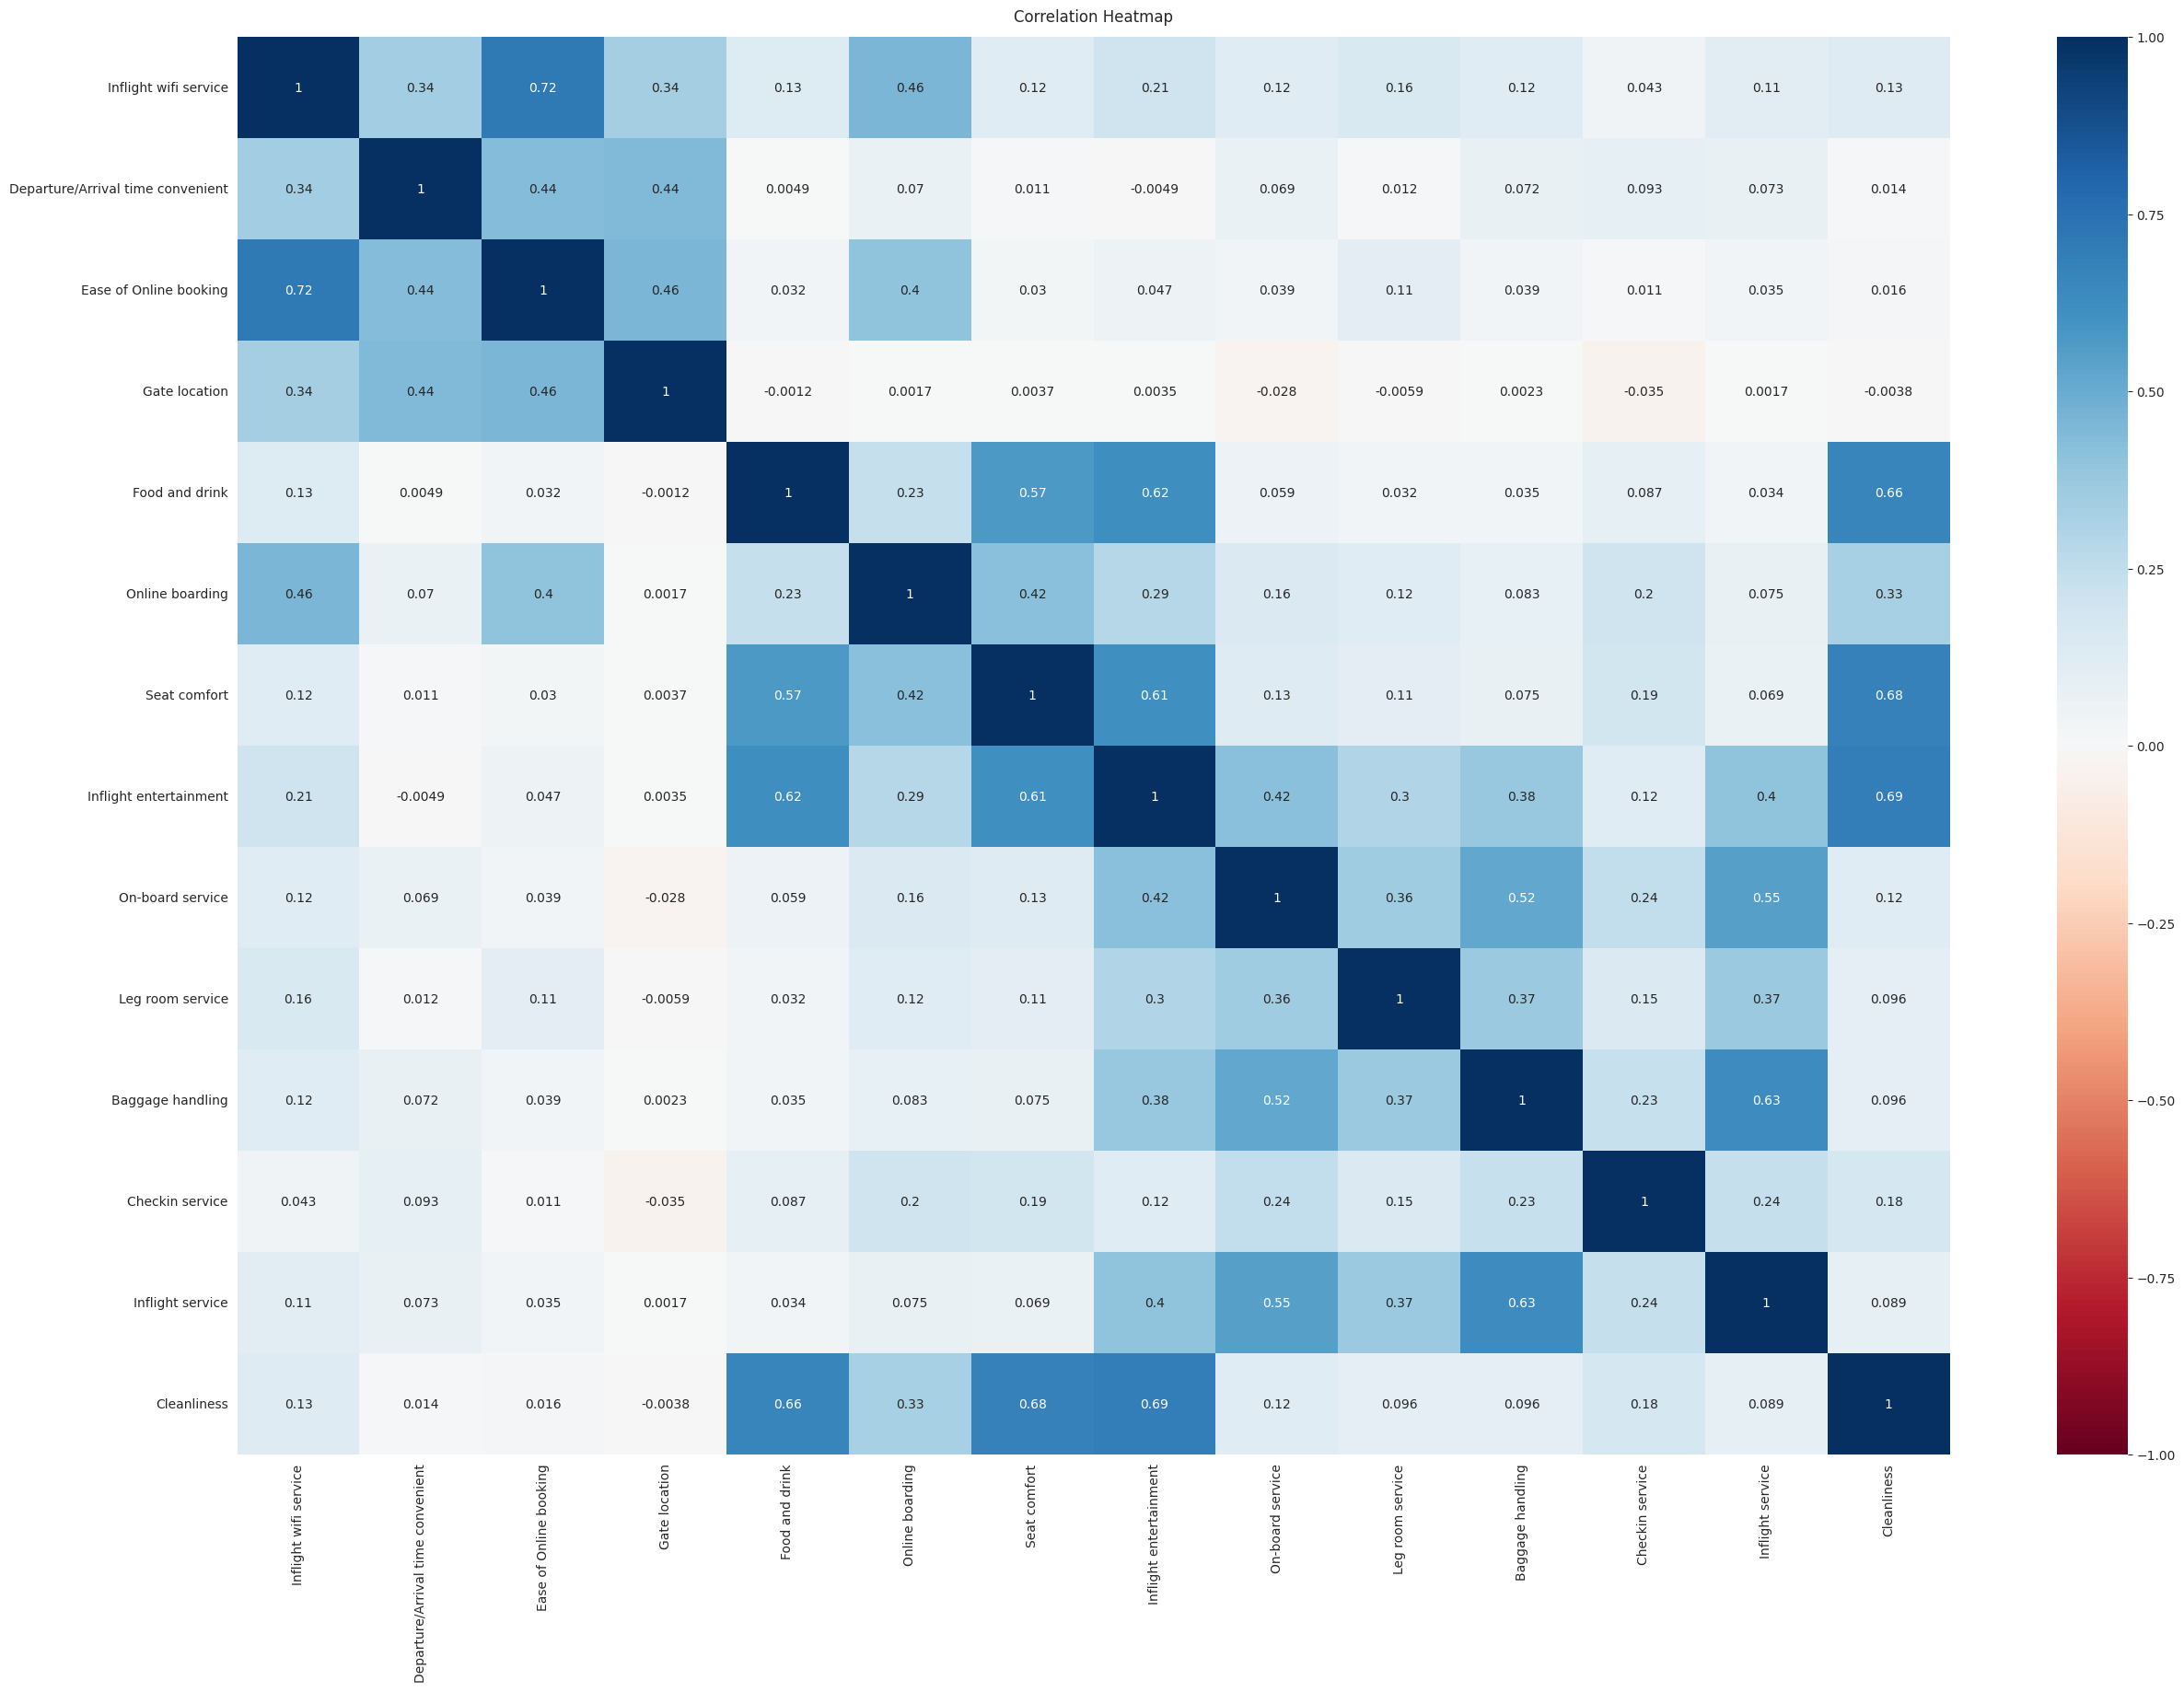

In [46]:
heatmap = sns.heatmap(dataframe_train_scores.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

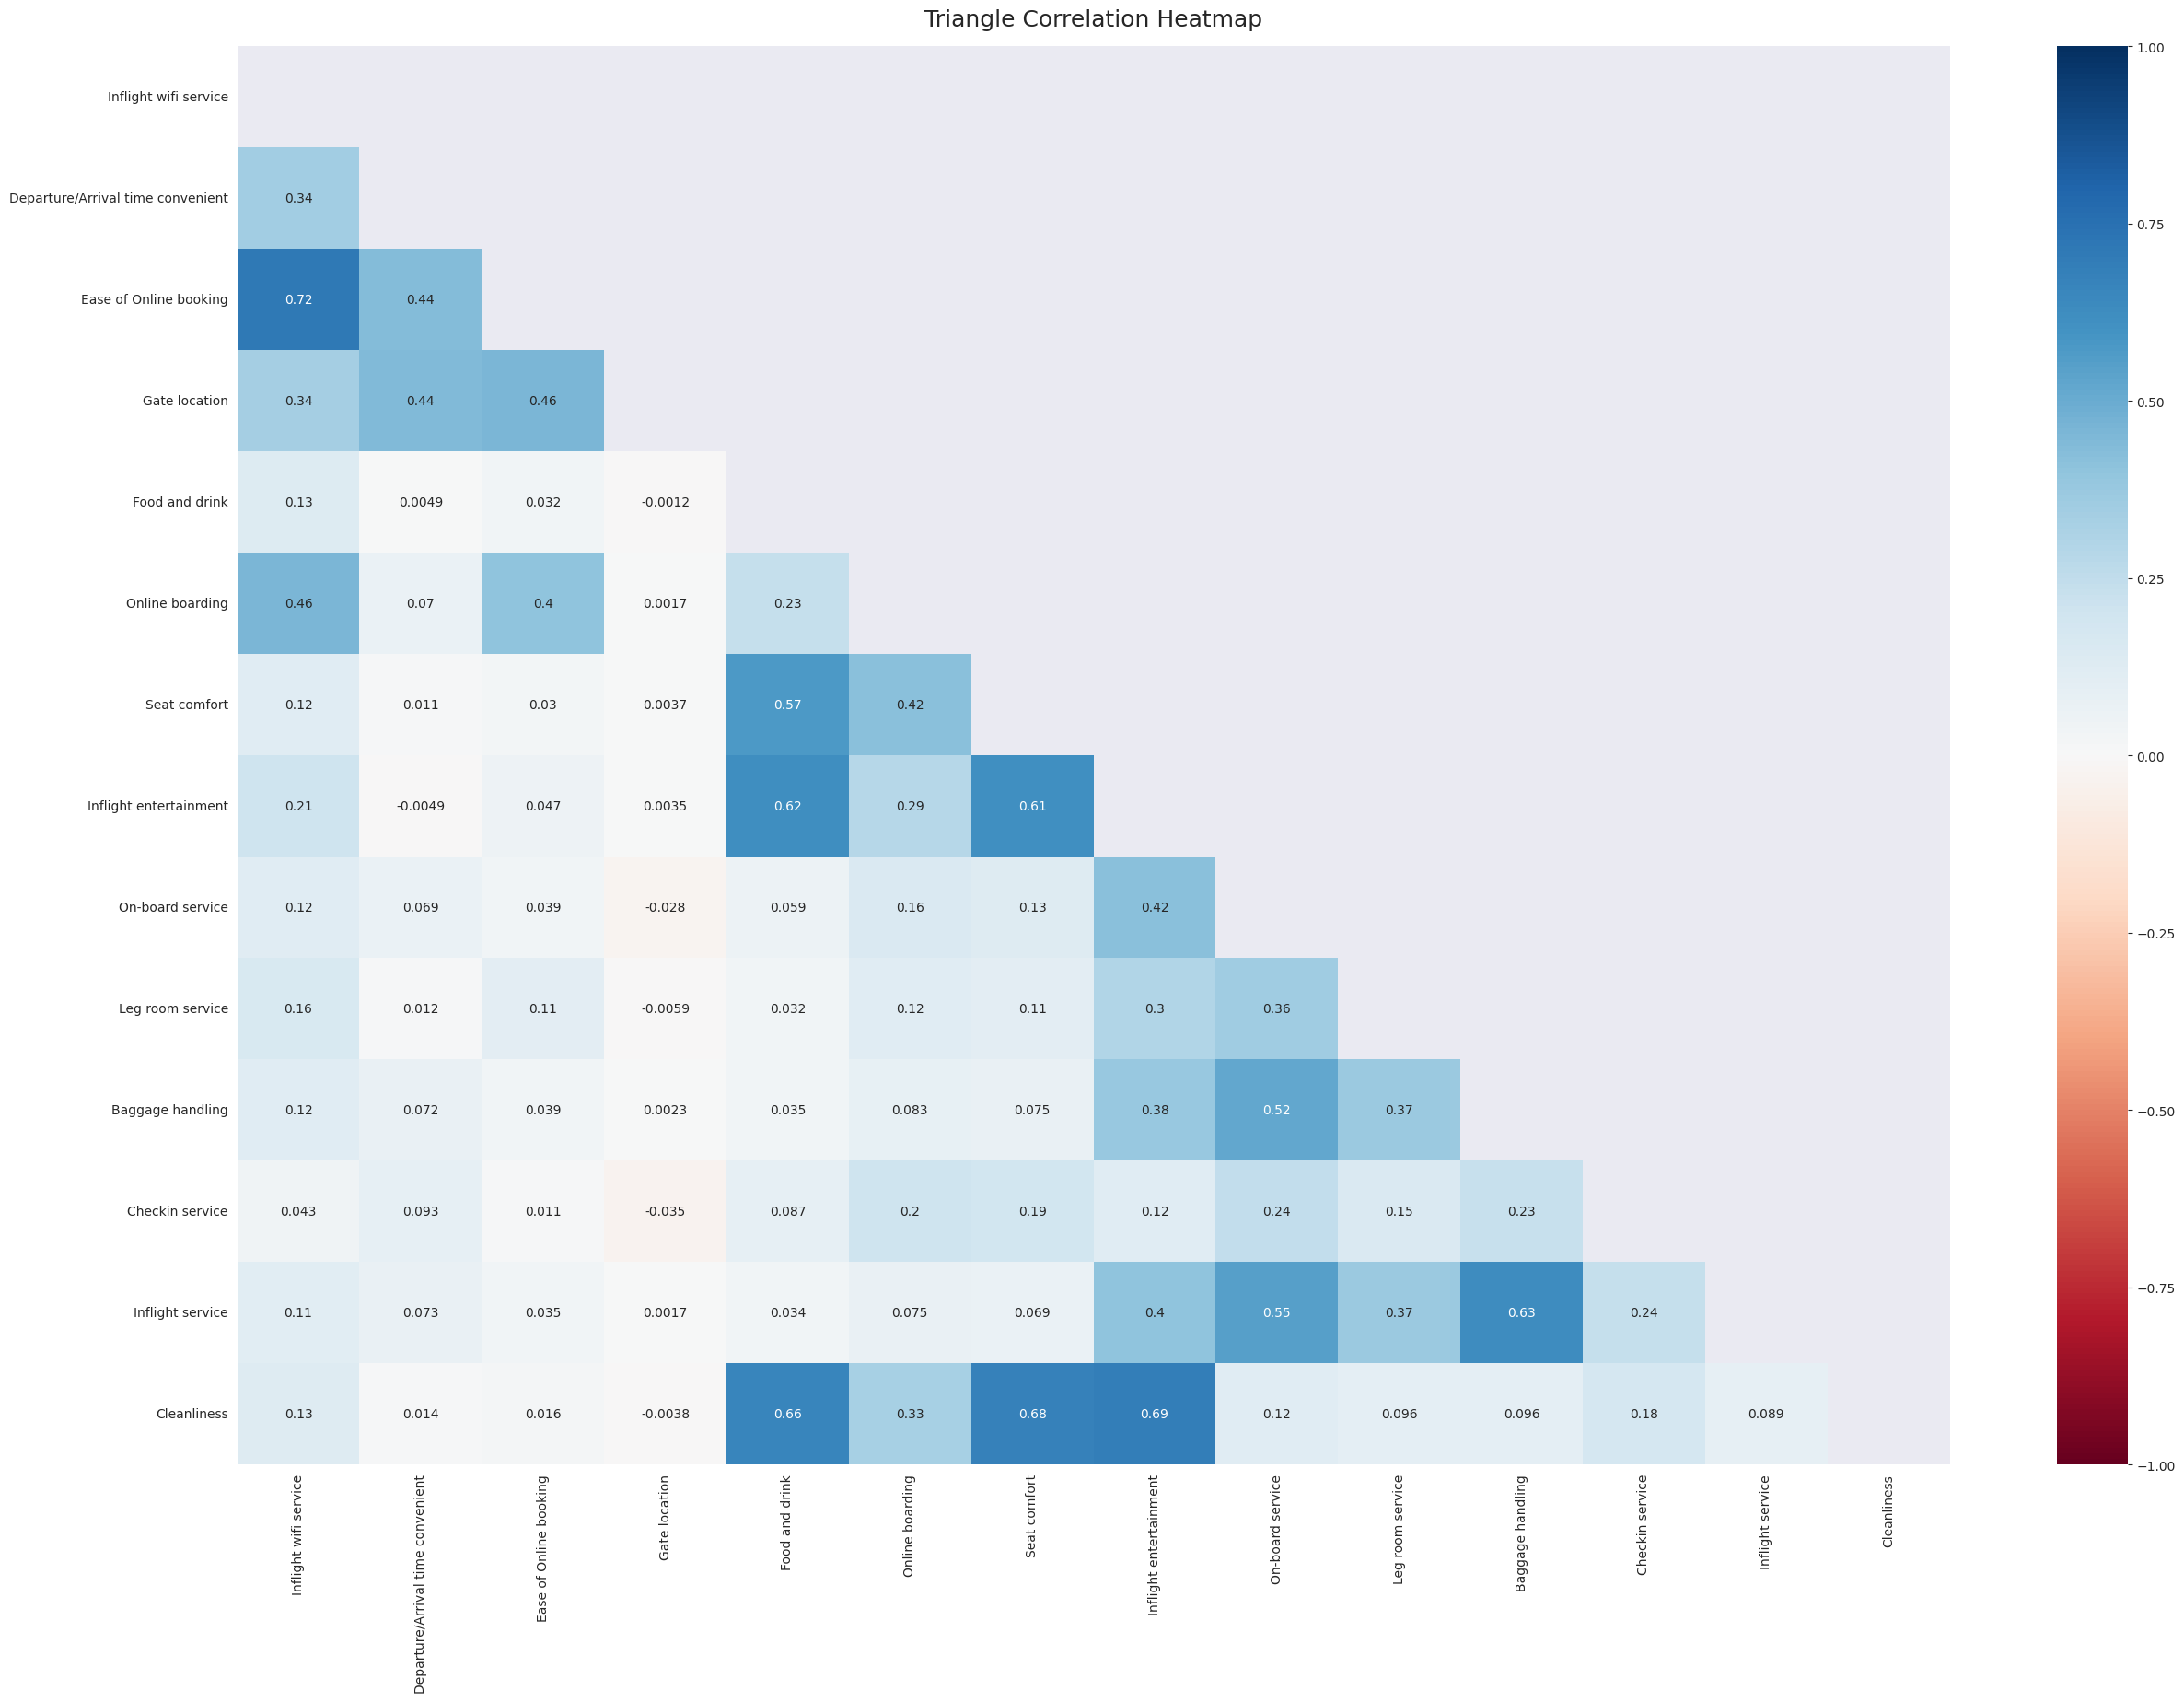

In [47]:
mask = np.triu(np.ones_like(dataframe_train_scores.corr(), dtype=np.bool))
heatmap1 = sns.heatmap(dataframe_train_scores.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap1.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Factors with higher correlation ( >0.6) 

Ease of Online booking - Inflight Wi-Fi service (0.72)

Cleanliness - Inflight entertainment (0.69)

Cleanliness - Seat comfort (0.68)

Cleanliness - Food and drinks (0.66)

Inflight service - Baggage handling (0.63)

Inflight entertainment - Food and drinks (0.62)

Inflight entertainment - Seat comfort (0.61) 

In [48]:
value_map = {"satisfied": 1.0, "neutral or dissatisfied": 0.0}
data_1 = dataframe_train['satisfaction']
mapped_data = [value_map[x] for x in data_1]
float_data = [float(x) for x in mapped_data]
print(mapped_data)
print(float_data)


.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0

In [49]:
Y = float_data
X = dataframe_train_scores
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [50]:
X_test.shape


(20781, 14)

In [51]:
X_train.shape


(83123, 14)

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values_1 = explainer(X_train)

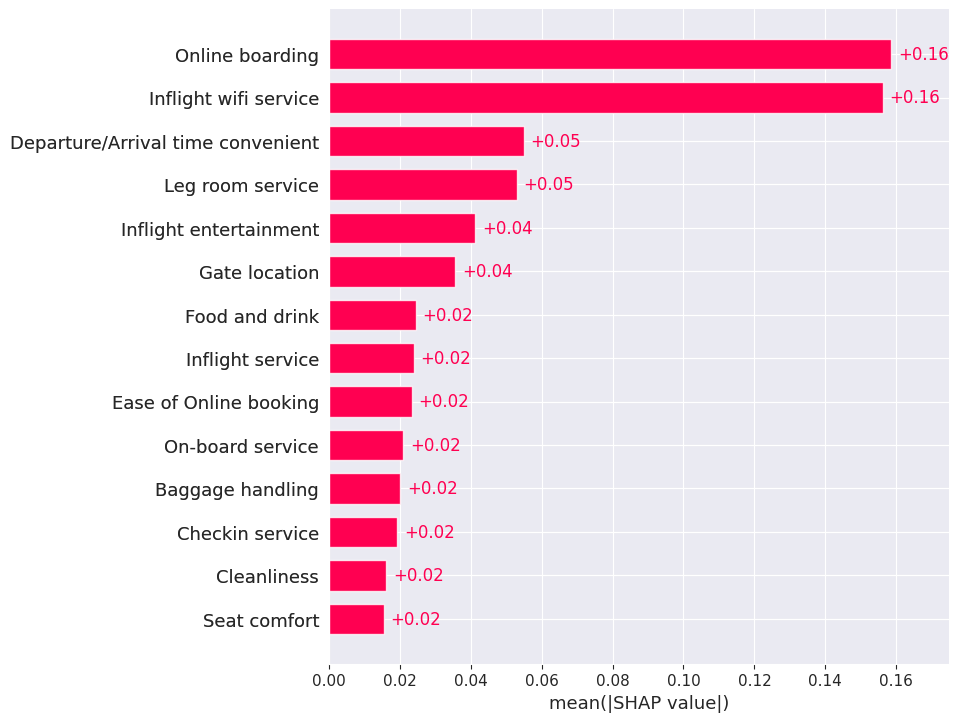

In [ ]:
shap.plots.bar(shap_values_1, max_display=14)

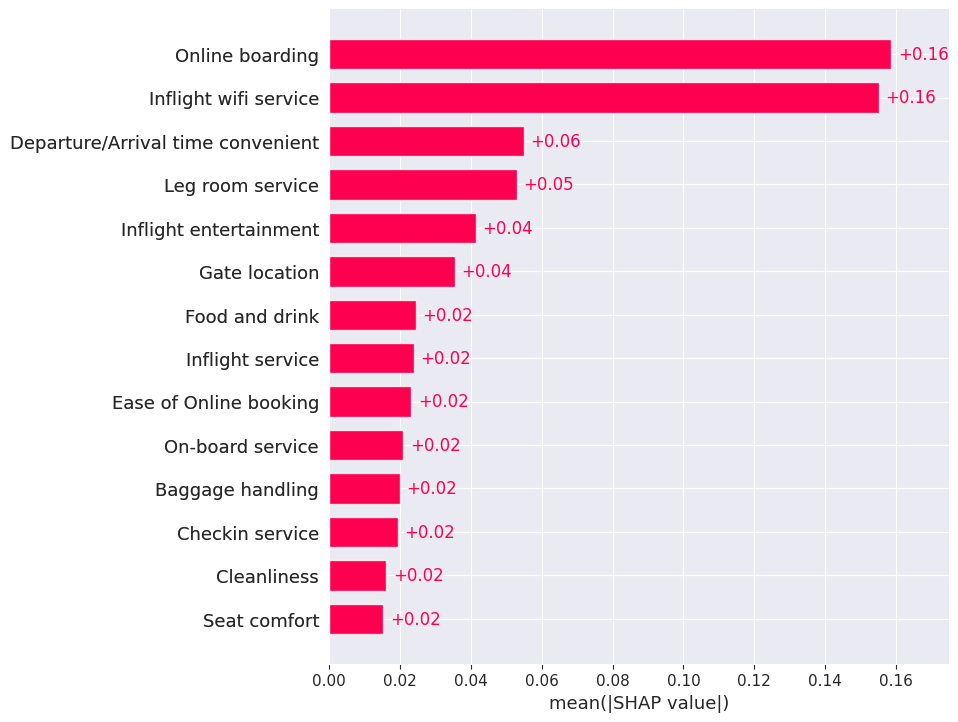

In [ ]:
shap.plots.bar(shap_values, max_display=14)

Online boarding and Inflight Wi-Fi service contribute the maximum to the overall customer satisfaction ratings.

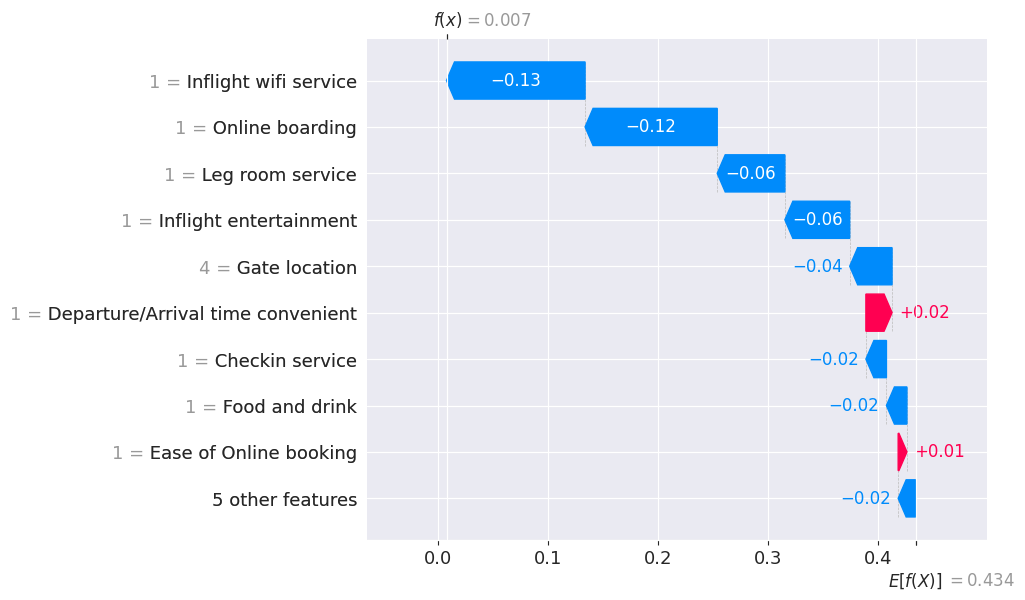

In [ ]:
shap.plots.waterfall(shap_values[0])

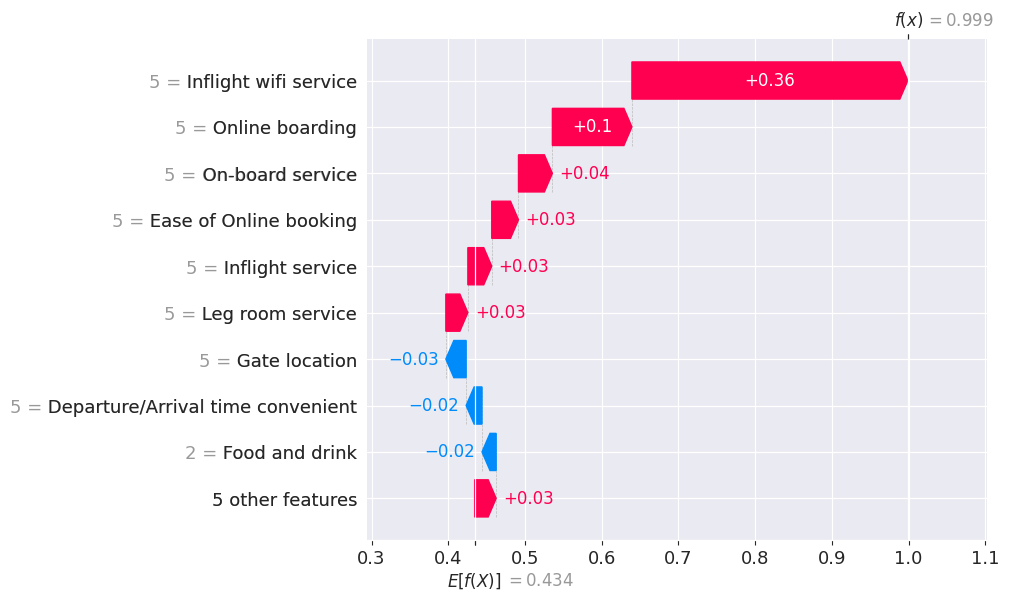

In [ ]:
shap.plots.waterfall(shap_values[1])

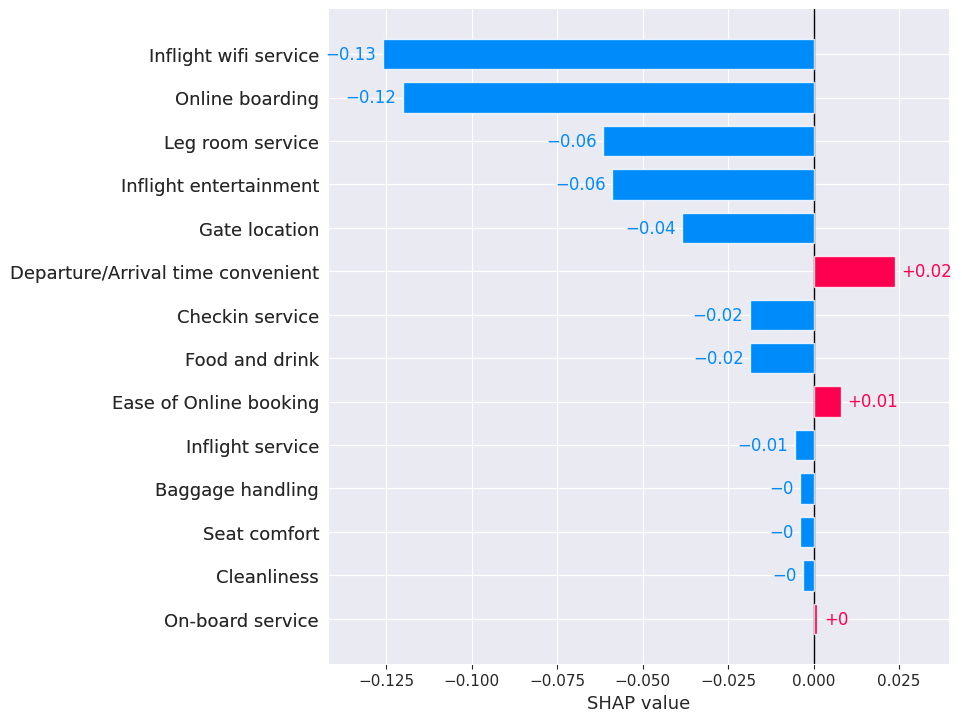

In [ ]:
shap.plots.bar(shap_values[0], max_display=14)

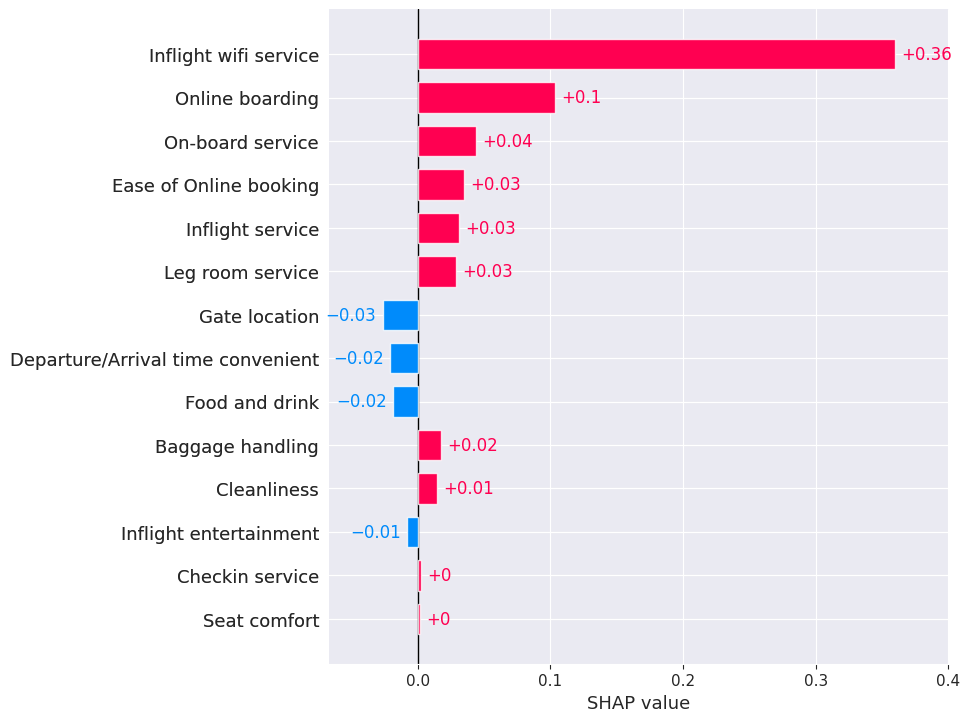

In [ ]:
shap.plots.bar(shap_values[1], max_display=14)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=951d9275-b203-4c00-b0fc-111e84cc9428' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>